In [1]:
#All cancer sets in one list
sets = ['set_ACC', 'set_BLCA', 'set_BRCA', 'set_CESC', 'set_CHOL', 'set_COAD', 'set_ESCA', 'set_GBM', 'set_HNSC', 
        'set_KIRC', 'set_KIRP', 'set_LGG', 'set_LIHC', 'set_LUAD', 'set_LUSC', 'set_MESO', 'set_PCPG', 'set_PRAD', 
        'set_SKCM', 'set_STAD', 'set_TGCT', 'set_THCA', 'set_UCEC']


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import os.path
import pickle

In [4]:
#read excel
#sets = ['set_ACC', 'set_BLCA', 'set_BRCA', 'set_CESC', 'set_CHOL', 'set_COAD', 'set_ESCA', 'set_GBM', 'set_HNSC', 
#        'set_KIRC', 'set_KIRP', 'set_LGG', 'set_LIHC', 'set_LUAD', 'set_LUSC', 'set_MESO', 'set_PCPG', 'set_PRAD', 
#        'set_SKCM', 'set_STAD', 'set_TGCT', 'set_THCA', 'set_UCEC']
#cancer_overlap_dict={}
#for cancer_type in sets:
#    #cancer_type = 'set_ACC'
#    path = os.path.join("./AR_Motif_Peaks", cancer_type +'.xlsx')
#    cancer_overlap_dict['df_'+cancer_type] = pd.read_excel(path)



In [5]:
#save to csv to make importing faster
#csv_names = list(cancer_overlap_dict.keys())
#for name in csv_names:
#    cancer_overlap_dict[name].to_csv(name, sep=',', index=False, encoding='utf-8')


In [6]:
#read csv files
sets = ['set_ACC', 'set_BLCA', 'set_BRCA', 'set_CESC', 'set_CHOL', 'set_COAD', 'set_ESCA', 'set_GBM', 'set_HNSC', 
        'set_KIRC', 'set_KIRP', 'set_LGG', 'set_LIHC', 'set_LUAD', 'set_LUSC', 'set_MESO', 'set_PCPG', 'set_PRAD', 
        'set_SKCM', 'set_STAD', 'set_TGCT', 'set_THCA', 'set_UCEC']

cancer_overlap_dict={}
for cancer_type in sets:
    path = os.path.join(".\Overlap_data", 'df_'+cancer_type)
    cancer_overlap_dict[cancer_type] = pd.read_csv(path)

In [7]:
cancer_overlap_dict['set_ACC']

,Unnamed: 0,seqnames,start,end,name,score,annotation,percentGC,percentAT,set_BRCA,...,set_LIHC,set_LUAD,set_LUSC,set_MESO,set_PCPG,set_SKCM,set_STAD,set_TGCT,set_THCA,set_UCEC
0,0,chr1,1291749,1292250,ACC_40,3.135160,3' UTR,0.638723,0.361277,1,...,1,1,1,0,1,1,1,1,1,1
1,1,chr1,1402045,1402546,ACC_54,5.524969,3' UTR,0.552894,0.447106,0,...,0,0,0,0,0,0,0,0,0,0
2,2,chr1,1440817,1441318,ACC_61,3.379238,3' UTR,0.656687,0.343313,1,...,1,1,1,1,1,0,1,1,1,0
3,3,chr1,1563647,1564148,ACC_73,4.257187,3' UTR,0.514970,0.485030,1,...,1,1,1,1,1,1,1,1,1,1
4,4,chr1,2189437,2189938,ACC_121,27.421921,3' UTR,0.662675,0.337325,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90772,90772,chrY,19075872,19076373,ACC_90762,9.739734,Promoter,0.570858,0.429142,0,...,0,0,0,0,0,0,0,0,0,0
90773,90773,chrY,19077217,19077718,ACC_90763,6.109282,Promoter,0.600798,0.399202,0,...,0,0,0,0,0,0,0,0,0,0
90774,90774,chrY,19077780,19078281,ACC_90764,6.836829,Promoter,0.628743,0.371257,0,...,1,0,1,0,0,0,0,0,1,0
90775,90775,chrY,19744474,19744975,ACC_90768,5.895118,Promoter,0.485030,0.514970,0,...,1,0,0,1,0,0,0,0,0,0


In [6]:
#make table matching cancer type to tumor surpressor, tumor driver and AR indifferent.
df_AR_type = pd.DataFrame(sets, columns =['cancer_type'])
#0 = tumor surpressor
#1 = tumor driver
#2 = AR indifferent
df_AR_type['AR_type'] = [1,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,2,1,0,0,0,0,1]
df_AR_type = df_AR_type.set_index('cancer_type')

dict_AR_type={}
k = 0
for cancer in sets:
    
    dict_AR_type[cancer] = df_AR_type['AR_type'][k]
    k+=1

In [7]:
df_AR_type

,AR_type
cancer_type,
set_ACC,1
set_BLCA,1
set_BRCA,0
set_CESC,1
set_CHOL,0
set_COAD,0
set_ESCA,1
set_GBM,1
set_HNSC,1


In [8]:
#Making comatrix from all dataframes
def co_matrix(cancer_overlap_dict, sets):
    dict_cancer_1op2={}
    for cancer1 in list(cancer_overlap_dict.keys()): 
        dict_cancer_1op2[cancer1] =cancer_overlap_dict[cancer1].iloc[:,-23:].sum(axis=0)
        #sort based on aplphabet
        dict_cancer_1op2[cancer1] =dict_cancer_1op2[cancer1].reindex(sorted(dict_cancer_1op2[cancer1].index), axis=1)
        
        #divide each count by minimum size between two.
        for cancer2 in list(cancer_overlap_dict.keys()):
            minimum_size = min(cancer_overlap_dict[cancer1].shape[0],cancer_overlap_dict[cancer2].shape[0])
            dict_cancer_1op2[cancer1][cancer2] = dict_cancer_1op2[cancer1][cancer2]/minimum_size
    #make dataframe and numpy matrix from dictionary
    comatrix = (pd.DataFrame(dict_cancer_1op2).to_numpy()+pd.DataFrame(dict_cancer_1op2).to_numpy().transpose())/2
    df_comatrix = pd.DataFrame(comatrix, index=sets, columns=sets)
    return comatrix, df_comatrix    

In [9]:
comatrix, df_comatrix = co_matrix(cancer_overlap_dict, sets)
df_comatrix

,set_ACC,set_BLCA,set_BRCA,set_CESC,set_CHOL,set_COAD,set_ESCA,set_GBM,set_HNSC,set_KIRC,...,set_LUAD,set_LUSC,set_MESO,set_PCPG,set_PRAD,set_SKCM,set_STAD,set_TGCT,set_THCA,set_UCEC
set_ACC,1.000000,0.481570,0.643621,0.583715,0.584557,0.511110,0.542125,0.521999,0.469221,0.529121,...,0.566377,0.506791,0.546176,0.480795,0.494955,0.472829,0.530470,0.475738,0.448032,0.490813
set_BLCA,0.481570,1.000000,0.704171,0.792187,0.705252,0.590820,0.640348,0.491959,0.601935,0.510452,...,0.632231,0.596351,0.546106,0.454172,0.532354,0.408337,0.592253,0.524383,0.476325,0.556583
set_BRCA,0.643621,0.704171,1.000000,0.897194,0.843628,0.660554,0.699882,0.700132,0.750449,0.720684,...,0.687558,0.698069,0.728262,0.615648,0.749117,0.620662,0.686590,0.685354,0.644999,0.782003
set_CESC,0.583715,0.792187,0.897194,1.000000,0.643563,0.778388,0.938601,0.537497,0.830931,0.667599,...,0.841568,0.886967,0.616143,0.526744,0.710886,0.593933,0.805140,0.551091,0.600971,0.736793
set_CHOL,0.584557,0.705252,0.843628,0.643563,1.000000,0.800201,0.812737,0.513717,0.652864,0.706147,...,0.823826,0.716019,0.583390,0.527478,0.683711,0.570348,0.829962,0.517402,0.575140,0.722925
set_COAD,0.511110,0.590820,0.660554,0.778388,0.800201,1.000000,0.657004,0.520074,0.607495,0.585897,...,0.626981,0.546776,0.576323,0.490569,0.553427,0.456270,0.689543,0.577046,0.489420,0.612359
set_ESCA,0.542125,0.640348,0.699882,0.938601,0.812737,0.657004,1.000000,0.561253,0.759292,0.614812,...,0.644496,0.712952,0.638934,0.504089,0.550523,0.487689,0.676712,0.610343,0.522066,0.628001
set_GBM,0.521999,0.491959,0.700132,0.537497,0.513717,0.520074,0.561253,1.000000,0.513160,0.567577,...,0.566307,0.546356,0.501225,0.519057,0.518759,0.566391,0.535561,0.464614,0.483354,0.543155
set_HNSC,0.469221,0.601935,0.750449,0.830931,0.652864,0.607495,0.759292,0.513160,1.000000,0.517442,...,0.670445,0.731500,0.570123,0.440932,0.537338,0.480314,0.623699,0.555289,0.455735,0.572960
set_KIRC,0.529121,0.510452,0.720684,0.667599,0.706147,0.585897,0.614812,0.567577,0.517442,1.000000,...,0.639863,0.553055,0.603701,0.482751,0.539620,0.492647,0.607032,0.519869,0.529529,0.578365


In [10]:
df_comatrix.mean().mean()

0.5965813297117909

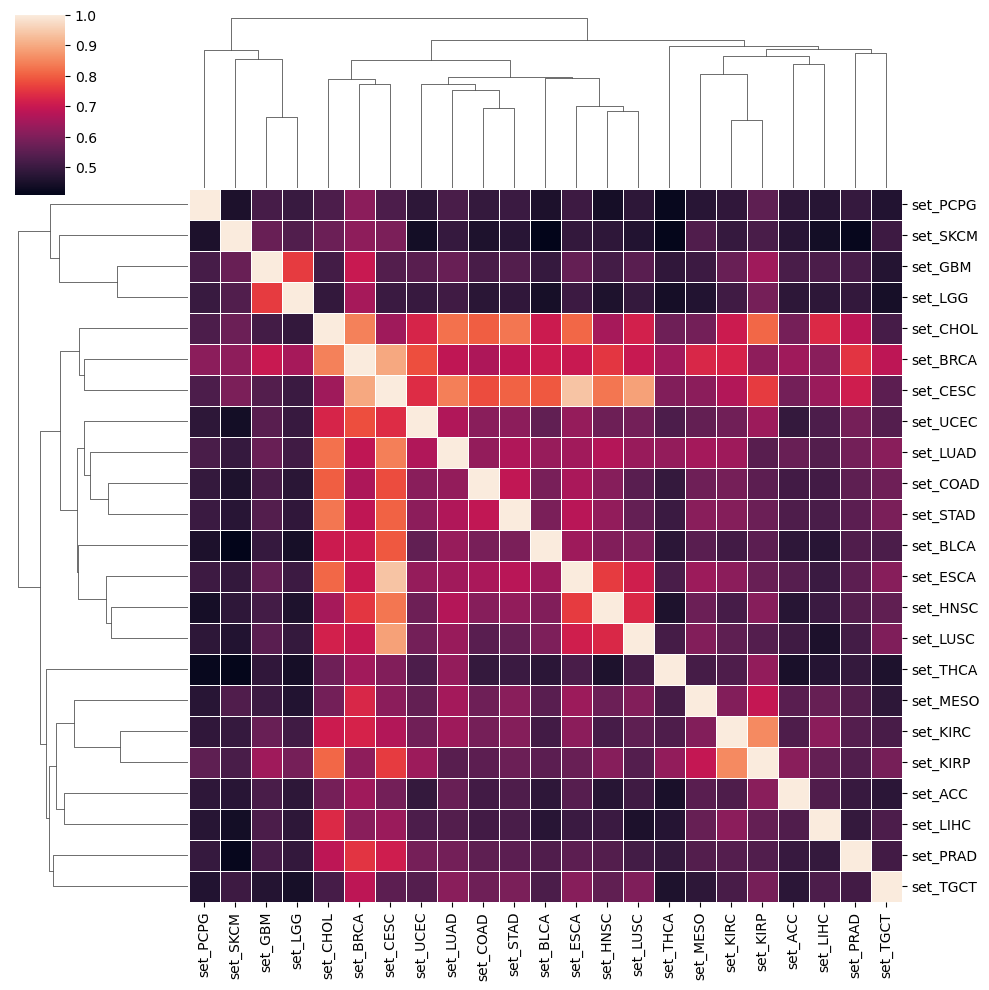

In [11]:
df_comatrix

import seaborn as sns
ax = sns.clustermap(df_comatrix, linewidth=0.5)
plt.show()

In [12]:

#extracts the indices from the correlation matrix, which are the stocks
stocks = df_comatrix.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(df_comatrix)


In [13]:
#Creates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

nx.set_node_attributes(G, dict_AR_type, name = "AR_type")
#shows the edges with their corresponding weights
#G.edges(data=True)

In [20]:
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(10,10))

    #draws nodes
    nx.draw_networkx_nodes(G, positions, node_color='orange',
                           node_size=500,alpha=0.9)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
    
    
    
    ### increases the value of weights, so that they are more visible in the graph
    weights2 = tuple([(1+abs(x))**1.2 for x in weights])  
    #draws the edges
    nx.draw_networkx_edges(G, positions, edgelist=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights2, edge_vmin = min(weights2), edge_vmax=max(weights2), edge_color = weights2, alpha=weights)
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show()

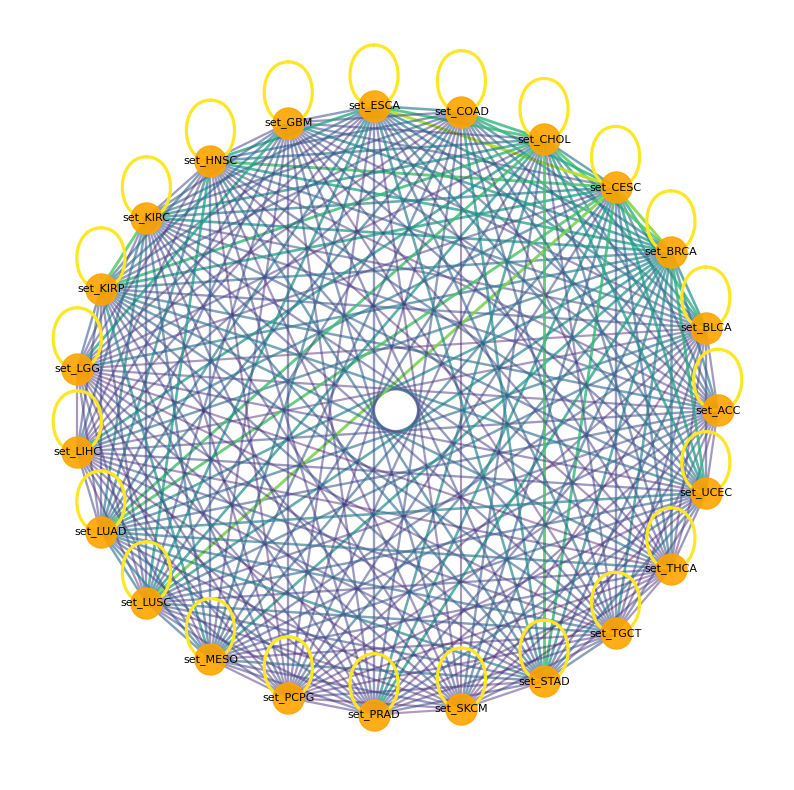

In [21]:
create_corr_network_1(G)
nx.write_graphml(G, 'overlap_no_motifs_types.graphml')

# Trying to plot all interval data

In [259]:
from matplotlib import colormaps

finished set_ACC 1
finished set_BLCA 2
finished set_BRCA 3
finished set_CESC 4
finished set_CHOL 5
finished set_COAD 6
finished set_ESCA 7
finished set_GBM 8
finished set_HNSC 9
finished set_KIRC 10
finished set_KIRP 11
finished set_LGG 12
finished set_LIHC 13
finished set_LUAD 14
finished set_LUSC 15
finished set_MESO 16
finished set_PCPG 17
finished set_PRAD 18
finished set_SKCM 19
finished set_STAD 20
finished set_TGCT 21
finished set_THCA 22
finished set_UCEC 23


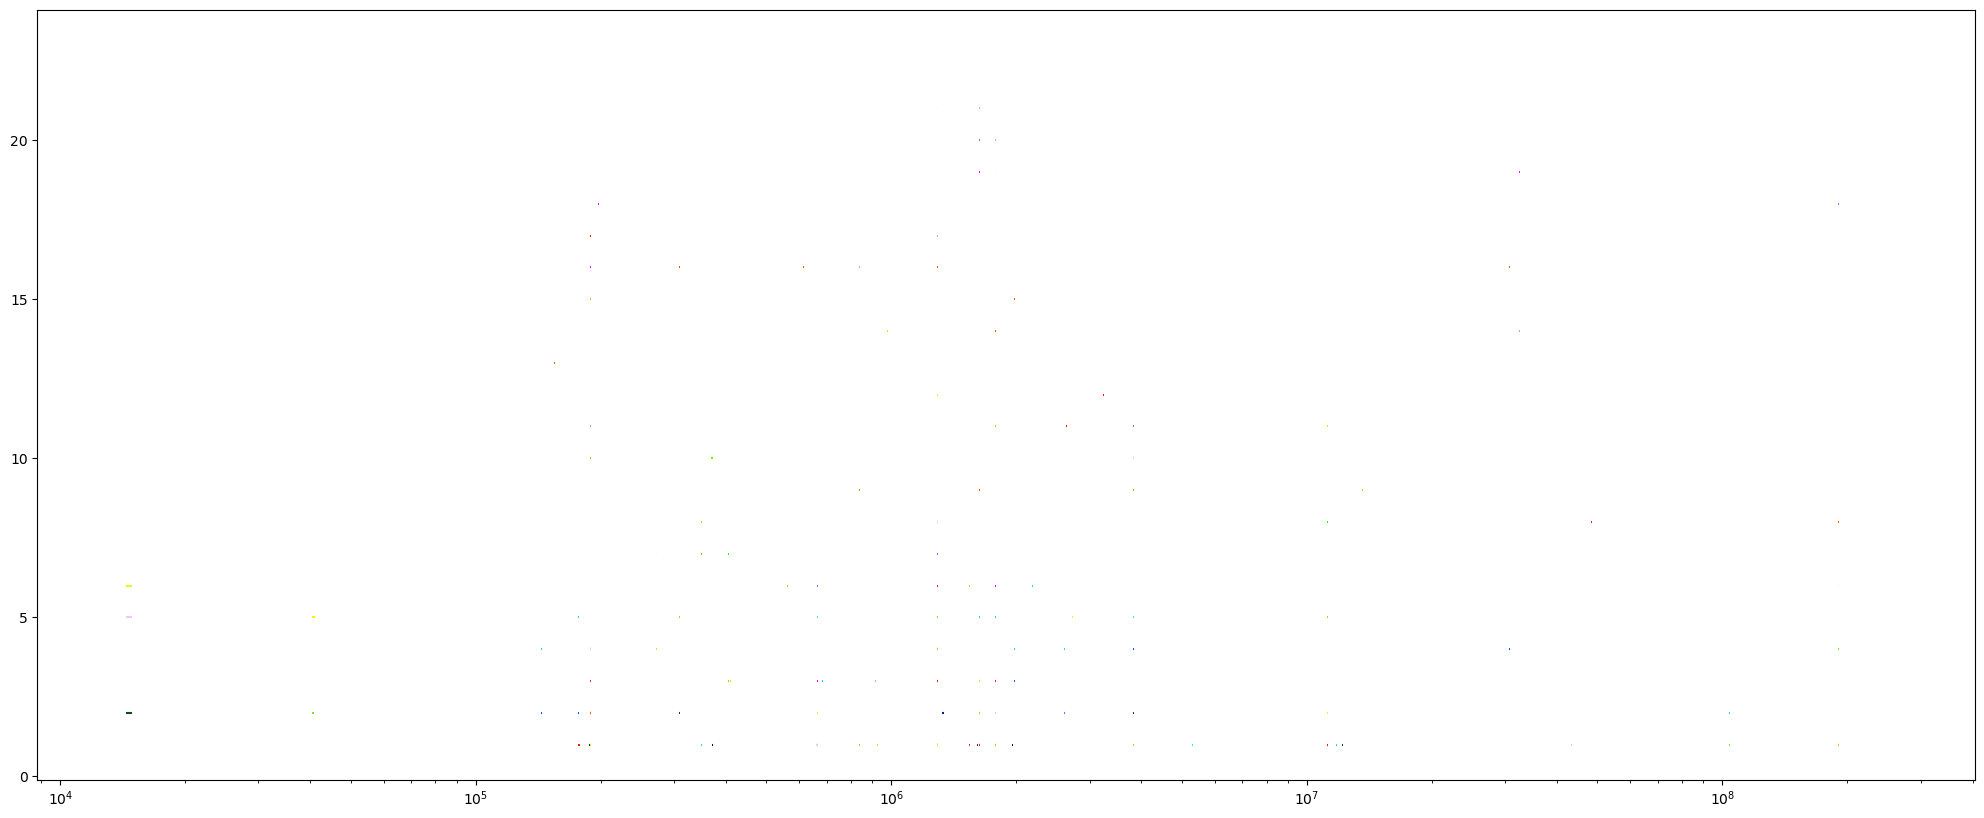

In [309]:
cancers_done=[]
n = 23
colors = plt.cm.gist_ncar(np.linspace(0, 1, n))

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111)
plt.xlim(900000,1000000)
for set_cancer, color in zip(sets,colors):
    start_list = cancer_overlap_dict[set_cancer]['start']
    end_list = cancer_overlap_dict[set_cancer]['end']
    cancer_overlap = cancer_overlap_dict[set_cancer][cancers_done].sum(axis=1)
    for k in range(len(start_list)):
        overlap_counter = (cancer_overlap[k]+1)   
        ax.hlines(y=overlap_counter, xmin = start_list[k], xmax = end_list[k], colors = color)
    cancers_done.append(set_cancer)
    print('finished '+set_cancer+ ' '+str(len(cancers_done)))
plt.savefig('gene_plot.png', dpi=600)
plt.show()


# Making one big graph of all overlaps and add supressor and driver ratio for each interval

In [86]:
def df_combine_concat(cancer_overlap_dict): 
    
    #list all cancer supressors
    cancer_supressors = df_AR_type[df_AR_type['AR_type']==0].index
    cancer_drivers = df_AR_type[df_AR_type['AR_type']==1].index
    
    chromosome_list = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']
    order_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    chromosome_dict = {chromosome_list[i]: order_list[i] for i in range(len(chromosome_list))}

    #Concatenate all dataframes
    list_df_combine_cancer=[]
    for cancer in list(cancer_overlap_dict.keys()):
        supressor_ratio = cancer_overlap_dict[cancer][cancer_supressors].sum(axis=1)
        driver_ratio = cancer_overlap_dict[cancer][cancer_drivers].sum(axis=1)
        
        df_combine_cancer1 = cancer_overlap_dict[cancer].iloc[:,1:9].copy()
        df_combine_cancer1['supressor_ratio'] = supressor_ratio
        df_combine_cancer1['driver_ratio'] = driver_ratio
        
        df_combine_cancer1['cancer_type'] = [cancer]*cancer_overlap_dict[cancer].shape[0]
        df_combine_cancer1['AR_type'] = [dict_AR_type[cancer]]*cancer_overlap_dict[cancer].shape[0]
        list_df_combine_cancer.append(df_combine_cancer1)
    df_combine_concat = pd.concat(list_df_combine_cancer)

    df_combine_concat['chromosome_sort'] = df_combine_concat.seqnames.map(chromosome_dict)
    df_combine_concat =df_combine_concat.sort_values(['chromosome_sort','start']).reset_index(drop=False)
    df_combine_concat = df_combine_concat.iloc[:,1:11]
    return df_combine_concat


In [87]:
df_combine_concat = df_combine_concat(cancer_overlap_dict)

### make edge list with all intervals

In [64]:
def check_overlap(start1,end1,start2,end2):
    """
    Checks for overlap between two intervals

    Parameters
    ----------
    start1 : int
        start of interval1.
    end1 : int
        end of interval1.
    start2 : int
        start of interval2.
    end2 : int
        end of interval2.

    Returns
    -------
    overlap : bool
        True if overlap is detected.
    """
    overlap = False
    #if end1<start2 intervals or if start1>end2 intervals dont overlap. 
    #overlap true if oposite is true
    if not end1 < start2 and not start1>end2:
        overlap=True 
    return overlap

def overlap_ls12(list1, list2, df_combine_concat):
    edge_list=[]
    """
    Checks overlap of list1 with list2. Adds 1 overlap for each interval in 
    list1 overlapping with an interval in list2. In the end it divides the 
    total by max(len(list1),len(list2)) to calculate ls12.

    Parameters
    ----------
    list1 : list
        List containing intervals in order.
    list2 : list
        List containing intervals in order.

    Returns
    -------
    ls12 : int
        Average overlap list1 with list2. 
        This is non-commutative so turning both lists around would give 
        different result total_overlap_ls12/max(len(list1),len(list2))
    """
    #reset all the variables
    index1 = 0 #interval number of list 1
    index2 = 0 #interval number of list 2
    total_overlap_ls12 = 0
    
    #loop over the list till it has come to an end since list lengths can vary.
    while index1 <len(list1):
        start1 = list1[index1][0]
        end1 = list1[index1][1]
        start2 = list2[index2][0]
        end2 = list2[index2][1]
        #compute current intervals
        #check for overlap between the intervals
        overlap_interval = check_overlap(start1,end1,start2,end2)

       
        #if OVERLAP FALSE
        #go to next interval1 if end1<start2
        #go to next interval2 if end2<start1           
        if overlap_interval == False:
            #go to next interval2 if interval2 is before interval1
            if end2 < start1:
                #check if list2 has come to end: If true add to index1 instead of index2
                if index2 == len(list2)-1:
                    index1 +=1
                else:
                    index2 +=1

            #go to next interval1 if interval2 is after interval1
            elif end1 < start2:
                index1 +=1
                index2= index1

        #if OVERLAP TRUE 
        if overlap_interval== True:
            if index2 <len(list2)-1:
                index2+=1
            else:
                index1 +=1
                index2 = index1
            #edge_list.append((index1+last_index, index2+last_index))
            edge_list.append((df_combine_concat['name'][index1], df_combine_concat['name'][index2]))
    #last_index = last_index+ len(list1)
        
    return edge_list

In [65]:
def chromosome_edge_list(df_combine_concat):    
    last_index = 0
    unique_chromosome=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']
    chromosome_edge_list=[]
    for chromosome in unique_chromosome:
        print(chromosome)
        start_list = df_combine_concat[df_combine_concat['seqnames'] == chromosome]['start'].tolist()
        end_list = df_combine_concat[df_combine_concat['seqnames'] == chromosome]['end'].tolist()
        interval_list =list(zip(start_list, end_list))
        edge_list = overlap_ls12(interval_list, interval_list, df_combine_concat)

        chromosome_edge_list.append(edge_list)
    return chromosome_edge_list

In [34]:
chromosome_edge_list_1 = chromosome_edge_list(df_combine_concat)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX
chrY


In [35]:
#flatten edge list
edge_list = [item for sublist in chromosome_edge_list_1 for item in sublist]

#node attributes
node_attributes = df_combine_concat.to_dict('index')

In [ ]:
#create graph
#Gint = nx.from_edgelist(edge_list)
#nx.set_node_attributes(Gint, node_attributes)
#nx.write_graphml(Gint, 'interval_graph_nomotifs_all_edges.graphml')

# With motif search

In [41]:
#read csv files
sets_motif = ['set_ACC', 'set_BRCA', 'set_CESC', 'set_CHOL', 'set_COAD', 'set_ESCA', 'set_GBM', 'set_HNSC', 
        'set_KIRC', 'set_KIRP', 'set_LGG', 'set_LIHC', 'set_LUAD', 'set_LUSC', 'set_MESO', 'set_PCPG', 
        'set_SKCM', 'set_STAD', 'set_TGCT', 'set_THCA', 'set_UCEC']
#no PRAD, No BLCA


cancer_motif_overlap_dict={}
for cancer_type in sets_motif:
    path = os.path.join(".\AR_Motif_Peaks", cancer_type)
    cancer_motif_overlap_dict[cancer_type] = pd.read_csv(path+'.csv')

In [42]:
#Making comatrix from all motif dataframes
def co_matrix_motif(cancer_overlap_dict, sets):
    dict_cancer_1op2={}
    for cancer1 in list(cancer_overlap_dict.keys()): 
        dict_cancer_1op2[cancer1] =cancer_overlap_dict[cancer1].iloc[:,-21:].sum(axis=0)
        #sort based on aplphabet
        dict_cancer_1op2[cancer1] =dict_cancer_1op2[cancer1].reindex(sorted(dict_cancer_1op2[cancer1].index), axis=1)
        
        #divide each count by minimum size between two.
        for cancer2 in list(cancer_overlap_dict.keys()):
            minimum_size = min(cancer_overlap_dict[cancer1].shape[0],cancer_overlap_dict[cancer2].shape[0])
            dict_cancer_1op2[cancer1][cancer2] = dict_cancer_1op2[cancer1][cancer2]/minimum_size
    #make dataframe and numpy matrix from dictionary
    comatrix = (pd.DataFrame(dict_cancer_1op2).to_numpy()+pd.DataFrame(dict_cancer_1op2).to_numpy().transpose())/2
    df_comatrix = pd.DataFrame(comatrix, index=sets, columns=sets)
    return comatrix, df_comatrix    

In [43]:
comatrix_motif, df_comatrix_motif = co_matrix_motif(cancer_motif_overlap_dict, sets_motif)
df_comatrix_motif

,set_ACC,set_BRCA,set_CESC,set_CHOL,set_COAD,set_ESCA,set_GBM,set_HNSC,set_KIRC,set_KIRP,...,set_LIHC,set_LUAD,set_LUSC,set_MESO,set_PCPG,set_SKCM,set_STAD,set_TGCT,set_THCA,set_UCEC
set_ACC,1.000000,0.494672,0.445912,0.466752,0.348253,0.378597,0.382854,0.358240,0.408562,0.469061,...,0.358240,0.401720,0.425059,0.466223,0.360248,0.323057,0.369131,0.346629,0.337537,0.333351
set_BRCA,0.494672,1.000000,0.755018,0.717417,0.559573,0.593474,0.534847,0.639995,0.581548,0.510080,...,0.639995,0.505827,0.586961,0.619078,0.467925,0.506079,0.590709,0.544455,0.522308,0.676114
set_CESC,0.445912,0.755018,1.000000,0.494507,0.642299,0.825639,0.393038,0.719206,0.532168,0.610554,...,0.719206,0.487957,0.716881,0.459117,0.376347,0.432337,0.668709,0.383055,0.458589,0.586784
set_CHOL,0.466752,0.717417,0.494507,1.000000,0.679408,0.681725,0.378421,0.514329,0.597297,0.692578,...,0.514329,0.619048,0.711883,0.431060,0.396997,0.418104,0.713728,0.356928,0.452252,0.595796
set_COAD,0.348253,0.559573,0.642299,0.679408,1.000000,0.563769,0.343915,0.496160,0.427938,0.450036,...,0.496160,0.419201,0.541731,0.460161,0.336556,0.333152,0.606347,0.445748,0.358997,0.500767
set_ESCA,0.378597,0.593474,0.825639,0.681725,0.563769,1.000000,0.384438,0.669134,0.455069,0.462769,...,0.669134,0.382996,0.554588,0.533817,0.347307,0.360182,0.588301,0.480654,0.393633,0.515878
set_GBM,0.382854,0.534847,0.393038,0.378421,0.343915,0.384438,1.000000,0.336457,0.438292,0.486305,...,0.336457,0.369951,0.407273,0.398828,0.367905,0.406712,0.359227,0.337203,0.343849,0.376221
set_HNSC,0.358240,0.639995,0.719206,0.514329,0.496160,0.669134,0.336457,1.000000,0.420697,0.494953,...,1.000000,0.388369,0.578621,0.472125,0.307487,0.356877,0.516721,0.432535,0.356041,0.462594
set_KIRC,0.408562,0.581548,0.532168,0.597297,0.427938,0.455069,0.438292,0.420697,1.000000,0.746729,...,0.420697,0.484415,0.499531,0.527476,0.359634,0.365013,0.449674,0.399934,0.441727,0.436938
set_KIRP,0.469061,0.510080,0.610554,0.692578,0.450036,0.462769,0.486305,0.494953,0.746729,1.000000,...,0.494953,0.457648,0.441459,0.602528,0.403248,0.412451,0.477323,0.448959,0.522450,0.530380


In [44]:
df_comatrix_motif.mean().mean()

0.4837521936984941

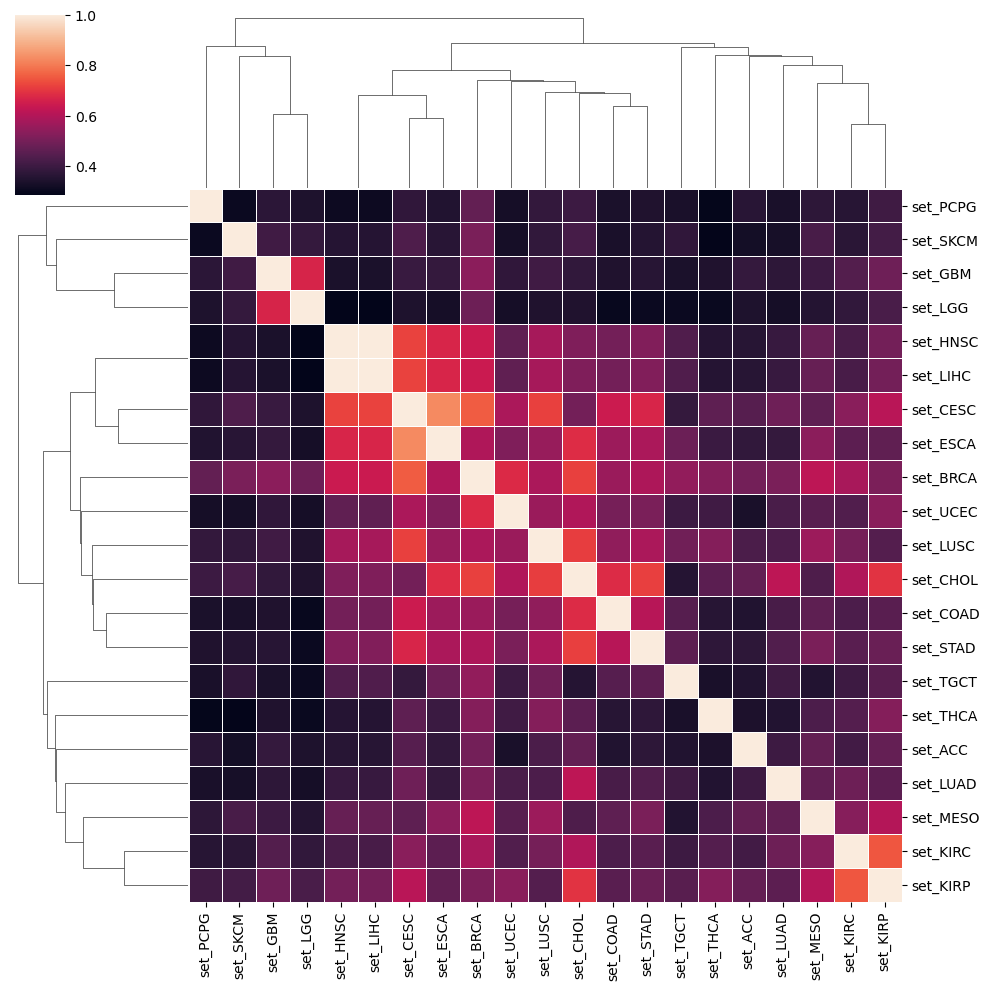

In [45]:
import seaborn as sns
ax = sns.clustermap(df_comatrix_motif, linewidth=0.5)
plt.show()

# Create motif search graph

In [57]:

#extracts the indices from the correlation matrix, which are the stocks
stocks = df_comatrix_motif.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(df_comatrix_motif)
print

<function print>

In [58]:
#Creates graph using the data of the correlation matrix
G_motif = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G_motif = nx.relabel_nodes(G_motif,lambda x: stocks[x])

nx.set_node_attributes(G_motif, dict_AR_type, name = "AR_type")
#shows the edges with their corresponding weights
#G.edges(data=True)

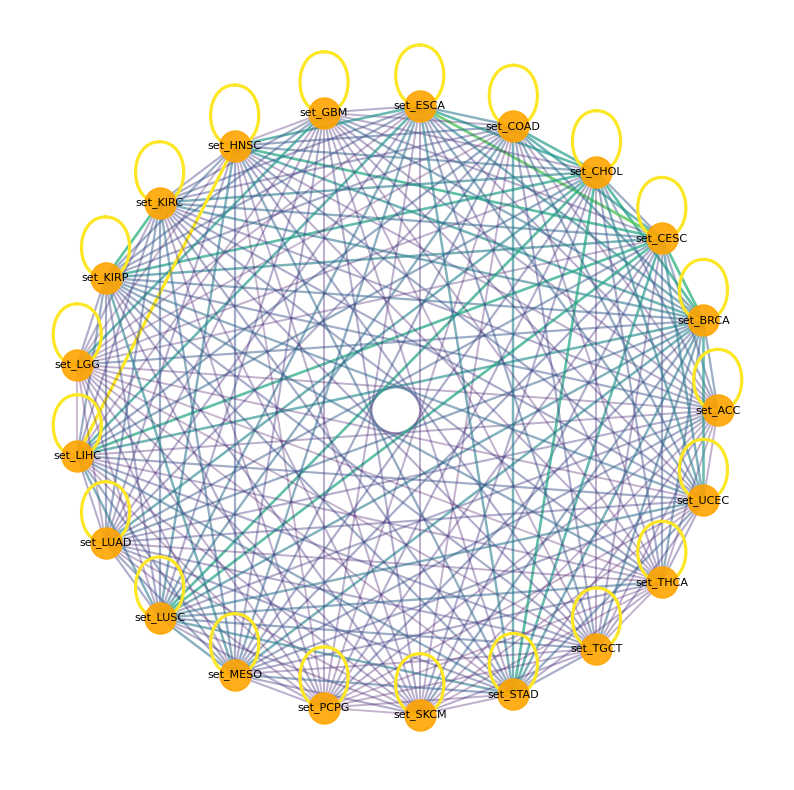

In [59]:
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.circular_layout(G)
    
    #Figure size
    plt.figure(figsize=(10,10))

    #draws nodes
    nx.draw_networkx_nodes(G, positions, node_color='orange',
                           node_size=500,alpha=0.9)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=8, 
                            font_family='sans-serif')
    
    
    
    ### increases the value of weights, so that they are more visible in the graph
    weights2 = tuple([(1+abs(x))**1.2 for x in weights])  
    #draws the edges
    nx.draw_networkx_edges(G, positions, edgelist=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights2, edge_vmin = min(weights2), edge_vmax=max(weights2), edge_color = weights2, alpha=weights)
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.png", format="PNG")
    plt.show() 

create_corr_network_1(G_motif)
nx.write_graphml(G_motif, 'overlap_motifs_types.graphml')

In [82]:
def df_combine_concat(cancer_overlap_dict):  
    chromosome_list = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']
    order_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    chromosome_dict = {chromosome_list[i]: order_list[i] for i in range(len(chromosome_list))}
    
    cancer_supressors = df_AR_type[df_AR_type['AR_type']==0].index.intersection(cancer_overlap_dict.keys())
    cancer_drivers = df_AR_type[df_AR_type['AR_type']==1].index.intersection(cancer_overlap_dict.keys())
    
    #Concatenate all dataframes
    list_df_combine_cancer=[]
    for cancer in list(cancer_overlap_dict.keys()):
        
        supressor_ratio = cancer_overlap_dict[cancer][cancer_supressors].sum(axis=1)
        driver_ratio = cancer_overlap_dict[cancer][cancer_drivers].sum(axis=1)
        
        df_combine_cancer1 = cancer_overlap_dict[cancer].iloc[:,1:11].copy()
        df_combine_cancer1['supressor_ratio'] = supressor_ratio
        df_combine_cancer1['driver_ratio'] = driver_ratio
        
        df_combine_cancer1['cancer_type'] = [cancer]*cancer_overlap_dict[cancer].shape[0]
        df_combine_cancer1['name'] = df_combine_cancer1['cancer_type']+ ['_']*cancer_overlap_dict[cancer].shape[0]+df_combine_cancer1.index.astype(str)
        
        df_combine_cancer1['AR_type'] = [dict_AR_type[cancer]]*cancer_overlap_dict[cancer].shape[0]
        list_df_combine_cancer.append(df_combine_cancer1)
    df_combine_concat = pd.concat(list_df_combine_cancer)

    df_combine_concat['chromosome_sort'] = df_combine_concat.seqnames.map(chromosome_dict)
    df_combine_concat =df_combine_concat.sort_values(['chromosome_sort','start']).reset_index(drop=False)
    df_combine_concat = df_combine_concat.iloc[:,1:15]
    return df_combine_concat

In [151]:
def chromosome_edge_list(df_combine_concat):    
    last_index = 0
    unique_chromosome=['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chrX','chrY']
    chromosome_edge_list=[]
    for chromosome in unique_chromosome:
        print(chromosome)
        start_list = df_combine_concat[df_combine_concat['seqnames'] == chromosome]['start'].tolist()
        end_list = df_combine_concat[df_combine_concat['seqnames'] == chromosome]['end'].tolist()
        interval_list =list(zip(start_list, end_list))
        edge_list = overlap_ls12(interval_list, interval_list, df_combine_concat)

        chromosome_edge_list.append(edge_list)
        #flatten edge list
        edge_list = [item for sublist in chromosome_edge_list for item in sublist]

        #node attributes
        node_attributes = df_combine_concat.set_index('name').to_dict('index')
        
    return edge_list, node_attributes

In [84]:
df_combine_motif_concat= df_combine_concat(cancer_motif_overlap_dict)

In [85]:
chromosome_motif_edge_list, node_attributes_motif = chromosome_edge_list(df_combine_motif_concat)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX
chrY


In [123]:
#create graph
#Gint_motif = nx.from_edgelist(chromosome_motif_edge_list)
#nx.set_node_attributes(Gint_motif, node_attributes_motif)
#nx.write_graphml(Gint_motif, 'interval_graph_motifs.graphml')

In [1]:
cancer_motif_overlap_dict['set_ACC'].shape()
cancer_overlap_dict['set_ACC'].shape()

NameError: name 'cancer_motif_overlap_dict' is not defined

## Select significant peaks that are in the upper quartile

In [96]:
df_combine_motif_concat['supressor_ratio'].mean()

4.934009239297813

In [105]:
#upper quantile for repressor and 
df_combine_motif_concat['driver_ratio'].quantile([0.25,0.75]), df_combine_motif_concat['supressor_ratio']

(0.25    1.0
 0.75    5.0
 Name: driver_ratio, dtype: float64,
 0.25    2.0
 0.75    8.0
 Name: supressor_ratio, dtype: float64)

In [156]:
df_combine_motif_concat['oncogene_counts_difference'] = (df_combine_motif_concat['driver_ratio']- df_combine_motif_concat['supressor_ratio'])
#10 percent peaks with the biggest difference
quantile1 = 0.025
quantile2 = 0.975
quantiles = df_combine_motif_concat['oncogene_counts_difference'].quantile([quantile1,quantile2])

df_motif_selection = df_combine_motif_concat[(df_combine_motif_concat['oncogene_counts_difference']>quantiles[quantile2]) | (df_combine_motif_concat['oncogene_counts_difference']<quantiles[quantile1])]
df_motif_selection['AR_type'] = df_motif_selection.cancer_type.map(dict_AR_type)
df_motif_selection.shape

C:\Users\20213709\AppData\Local\Temp\ipykernel_1812\2679936230.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_selection['AR_type'] = df_motif_selection.cancer_type.map(dict_AR_type)


(7071, 16)

In [157]:
df_motif_selection

,motif_id,motif_alt_id,seqnames,start,end,strand,score,p-value,q-value,matched_sequence,supressor_ratio,driver_ratio,cancer_type,name,oncogene_counts_difference,AR_type
12,MA0007.2,AR,chr1,268090.0,268104.0,-,12.6731,0.000029,0.521,CAGAACAGAGTGAAT,8,1,set_MESO,set_MESO_4105,-7,0
31,MA0007.2,AR,chr1,906851.0,906865.0,+,14.4423,0.000007,0.335,CAGAACAGCCAGTGC,12,5,set_PCPG,set_PCPG_1785,-7,2
40,MA0007.2,AR,chr1,935693.0,935707.0,+,11.2500,0.000068,0.446,AGGCACTCCCTGTGC,1,4,set_GBM,set_GBM_10935,3,1
109,MA0007.2,AR,chr1,1005583.0,1005597.0,+,14.4615,0.000007,0.415,aagcacacactgacc,1,4,set_HNSC,set_HNSC_1508,3,1
113,MA0007.2,AR,chr1,1005583.0,1005597.0,+,14.4615,0.000007,0.415,aagcacacactgacc,1,4,set_LIHC,set_LIHC_1508,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405744,MA0007.2,AR,chrY,12898604.0,12898618.0,-,13.8077,0.000013,0.377,AAGAACAAAAAGTTT,8,1,set_THCA,set_THCA_2911,-7,0
405766,MA0007.2,AR,chrY,16955974.0,16955988.0,-,11.5769,0.000057,0.449,GAGCACAGACTGAAA,0,3,set_PCPG,set_PCPG_10369,3,2
405768,MA0007.2,AR,chrY,17145854.0,17145868.0,-,10.8269,0.000085,0.464,GAGGACACGGTGATA,12,5,set_GBM,set_GBM_13096,-7,1
405825,MA0007.2,AR,chrY,20398512.0,20398526.0,-,12.3077,0.000037,0.389,GGGTACAGTGAGCTC,1,5,set_ACC,set_ACC_7971,4,1


In [158]:
df_motif_selection = df_motif_selection.reset_index(drop=False)
df_motif_selection = df_motif_selection.iloc[:,1:]
chromosome_motif_edge_list_selected, node_attributes_motif_selected = chromosome_edge_list(df_motif_selection)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr20
chr21
chr22
chrX
chrY


In [159]:
#create graph
Gint_motif_selected = nx.from_edgelist(chromosome_motif_edge_list_selected)
nx.set_node_attributes(Gint_motif_selected, node_attributes_motif_selected)
nx.write_graphml(Gint_motif_selected, 'interval_graph_motifs_selected.graphml')

# Pearson correlation

In [132]:
cancer_motif_overlap_dict['set_ACC']

,Unnamed: 0,motif_id,motif_alt_id,seqnames,start,end,strand,score,p-value,q-value,...,set_LIHC,set_LUAD,set_LUSC,set_MESO,set_PCPG,set_SKCM,set_STAD,set_TGCT,set_THCA,set_UCEC
0,0,MA0007.2,AR,chr15,85331374.0,85331388.0,-,18.9423,1.160000e-09,0.0660,...,0,0,0,0,0,0,0,0,0,0
1,1,MA0007.2,AR,chr9,94135446.0,94135460.0,-,18.9231,2.330000e-09,0.0660,...,1,1,1,1,1,0,1,1,1,0
2,2,MA0007.2,AR,chr3,141412459.0,141412473.0,-,18.9231,2.330000e-09,0.0660,...,0,0,0,0,0,0,0,0,0,0
3,3,MA0007.2,AR,chr7,108309058.0,108309072.0,+,18.6731,5.660000e-09,0.0803,...,1,0,1,1,1,0,1,0,1,0
4,4,MA0007.2,AR,chr16,20851736.0,20851750.0,-,18.6538,6.610000e-09,0.0803,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18483,18483,MA0007.2,AR,chr1,222928405.0,222928419.0,-,10.5000,9.940000e-05,0.4570,...,0,0,0,0,0,0,0,0,0,0
18484,18484,MA0007.2,AR,chr1,228085428.0,228085442.0,-,10.5000,9.940000e-05,0.4570,...,1,1,1,1,1,1,1,1,1,0
18485,18485,MA0007.2,AR,chr2,231800625.0,231800639.0,+,10.5000,9.940000e-05,0.4570,...,1,1,1,1,1,1,1,1,1,0
18486,18486,MA0007.2,AR,chr1,235902903.0,235902917.0,-,10.5000,9.940000e-05,0.4570,...,0,0,0,0,0,0,0,0,0,0
